In [86]:
import datetime
import os.path
import pickle
import numpy as np
import matplotlib.pyplot as plt
from data_cleaning.ml_utils import available_indices, extract_data, get_sliding_data
from data_cleaning.utils import *
from data_cleaning.predict import *
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [27]:
# linear regression
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

# machine learning methods
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor


In [28]:
# Load data
DATA_FOLDER = os.path.join("data_cleaning", "data")
def path(filename):
    return os.path.join(DATA_FOLDER, filename)

orig_full_data = np.load(path("full_np_data.pickle.npy"))
inter_full_data = np.load(path("linear_inter.pickle.npy"))
spline_full_data = np.load(path("spline_inter.pickle.npy"))
orig_dates = np.load(path("dates.pickle.npy"))
names = pickle.load(open(path("filenames.pickle"), "rb"))
dates = np.load(path("dates.pickle.npy"))

In [191]:
# Select date for predictions
start_date = datetime.date(day=3, month=1, year=2013)
end_date = datetime.date(day=31, month=12, year=2015)

In [192]:
# Get data and valid measurements indices
inds, data, config = extract_data(orig_dates, start_date, end_date, inter_full_data)
inds2, data_spline, config2 = extract_data(orig_dates, start_date, end_date, spline_full_data)
start = config["start"]
end = config["end"]
assert inds == inds2
print("Available indices: ", inds)
print(np.array(names)[inds])
print(config)

Available indices:  [4, 9, 24, 33, 38, 42, 45, 46, 47, 50, 51, 52]
['data/raw/85004.csv' 'data/raw/85012.csv' 'data/raw/85030.csv'
 'data/raw/85040.csv' 'data/raw/85050.csv' 'data/raw/85054.csv'
 'data/raw/85063.csv' 'data/raw/85064.csv' 'data/raw/85065.csv'
 'data/raw/85073.csv' 'data/raw/85075.csv' 'data/raw/85076.csv']
{'start': 23013, 'end': 24105}


24106


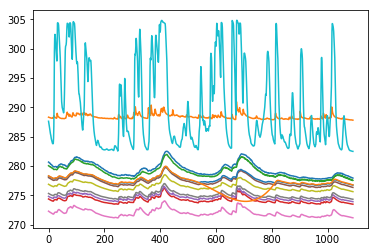

In [193]:
# Plot (linearly intrpolated) data acquired in that date range
print(len(inter_full_data[inds[2]]))
for part in data_spline:
    plt.plot(part)

data/raw/85076.csv
23013 24105
494 813
[278.34 278.32 278.31 ... 276.82 276.82 276.8 ]
[4, 9, 24, 33, 38, 42, 45, 46, 47, 50, 51, 52]
12
[4, 9, 24, 33, 38, 42, 45, 46, 47, 50, 51, 52]
12 773
r2 : 0.9996 |


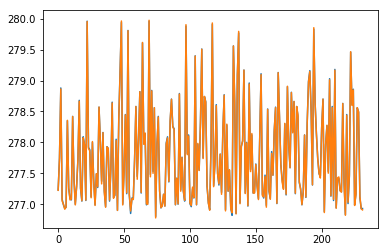

In [209]:
#plt.plot(data[11])
objective = 11
print(names[inds[objective]])
strange = orig_full_data[inds[objective]][start:end]
print(start, end)
fst = find_fst_nan(strange)
snd = find_last_nan(strange)
#plt.plot(strange)
print(fst, snd)
helper = Holder(fst, snd)
clip = helper.clip
print(strange)
other = [j for j in inds if j != 11]
print(other)
## Stack data
print(len(inds))
res = clip(res)
clipped_data = np.array(data)
clipped_data = np.array([clip(j) for j in clipped_data])
print(inds)
preds = predict_all(inds, clipped_data, objective, linear_model.LinearRegression)

10
10
[0, 1, 2, 4, 5, 6, 7, 8, 9, 10]


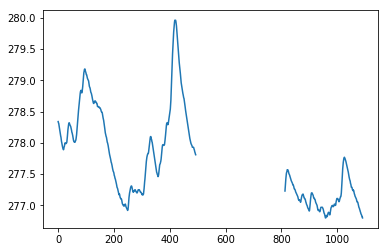

In [210]:
plt.plot(strange)
best = preds[0]
print(len(best[1]))
print(len(best[2].coef_))
print(best[1])

[0, 1, 2, 4, 5, 6, 7, 8, 9, 10]
10
(10, 773)
10


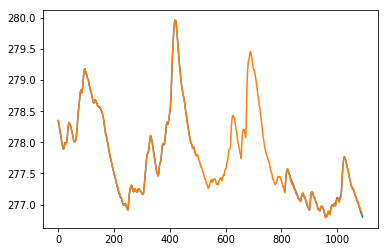

In [211]:
plt.plot(strange)
r2, fit_ind, model = best

print(fit_ind)
print(len(fit_ind))
print(clipped_data[fit_ind].shape)
print(len(clipped_data[fit_ind]))
plt.plot(model.predict(np.array(data)[fit_ind].T))


0.00016701126386214508
0.01025499716746238
[-3.46591332e-02 -1.48271627e-02 -3.18479222e-02  8.88751654e-02
  4.15697918e-01  8.73451126e-02 -1.26425083e-02 -3.66901152e-01
 -6.95800042e-04  8.43390449e-01]


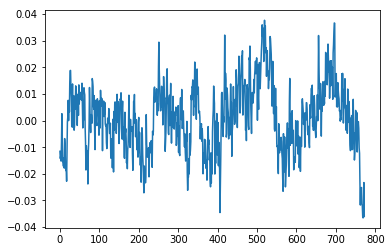

In [212]:
real = clipped_data[objective]
preddd = model.predict(clipped_data[fit_ind].T)
print(mean_squared_error(real, preddd))
print(mean_absolute_error(real, preddd))
plt.plot(clipped_data[objective] - model.predict(clipped_data[fit_ind].T))
cf1 = model.coef_
print(model.coef_)

0.0001689311029771162
0.010265373644152117
[-1.83961674e-02 -4.09024019e-02  4.09039714e-01  9.38131384e-02
  7.03346559e-02 -3.58949105e-01 -5.81429641e-04  8.20458700e-01]


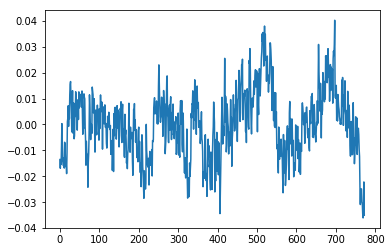

In [208]:
real = clipped_data[objective]
preddd = model.predict(clipped_data[fit_ind].T)
print(mean_squared_error(real, preddd))
print(mean_absolute_error(real, preddd))
plt.plot(clipped_data[objective] - model.predict(clipped_data[fit_ind].T))
cf2 = model.coef_
print(model.coef_)

ValueError: operands could not be broadcast together with shapes (10,) (8,) 

0 4
val: linear | spline
r2 : 0.9935 | 0.9948
mse: 0.0090 | 0.0072
mae: 0.0749 | 0.0669
1 9
val: linear | spline
r2 : 0.9289 | 0.9327
mse: 0.0130 | 0.0123
mae: 0.0814 | 0.0785
2 24
val: linear | spline
r2 : 0.9915 | 0.9920
mse: 0.0111 | 0.0105
mae: 0.0822 | 0.0803
3 33
val: linear | spline
r2 : 0.9942 | 0.9938
mse: 0.0017 | 0.0018
mae: 0.0317 | 0.0336
4 38
val: linear | spline
r2 : 0.9981 | 0.9982
mse: 0.0005 | 0.0005
mae: 0.0167 | 0.0162
5 42
val: linear | spline
r2 : 0.9993 | 0.9995
mse: 0.0004 | 0.0003
mae: 0.0158 | 0.0138
6 45
val: linear | spline
r2 : 0.9829 | 0.9835
mse: 0.0064 | 0.0062
mae: 0.0600 | 0.0594
7 46
val: linear | spline
r2 : 0.9995 | 0.9995
mse: 0.0002 | 0.0001
mae: 0.0094 | 0.0089
8 47
val: linear | spline
r2 : 0.9992 | 0.9993
mse: 0.0003 | 0.0003
mae: 0.0139 | 0.0129
9 50
val: linear | spline
r2 : 0.5851 | 0.5743
mse: 21.5834 | 22.1428
mae: 3.6376 | 3.6900
10 51
val: linear | spline
r2 : 0.9991 | 0.9991
mse: 0.0005 | 0.0004
mae: 0.0174 | 0.0164
11 52
val: linear | 

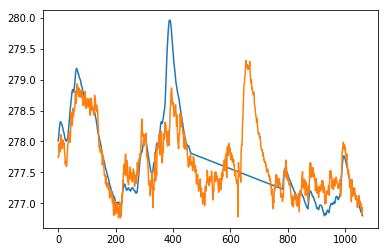

In [39]:
full_test(linear_model.LinearRegression(), inds, data, data_spline, bad_indices=(-11,))

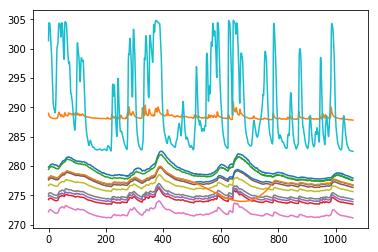

In [8]:
for part in data_spline:
    plt.plot(part)

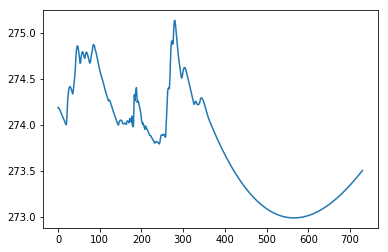

In [8]:
plt.plot(data_spline[5])
# Fifth one is bad -> Remove it
bad_indices = [5]

In [9]:
# Do machine learning
regressor = linear_model.LinearRegression()
for real in range(len(inds)):
    if real in bad_indices:
        continue
    input_inds = [j for j in range(len(data)) if j != real and j not in bad_indices]
    input_data = np.array([data[j] for j in input_inds])
    predicted_inter = cross_val_predict(regressor, input_data.T,data[real], cv = 10);
    input_data = np.array([data_spline[j] for j in input_inds])
    predicted_spline = cross_val_predict(regressor, input_data.T,data_spline[real], cv = 10);
    print(real, inds[real])
    print("val: linear | spline")
    print("r2 :", "{0:1.4f} |".format(r2_score(data[real], predicted_inter)), "{0:1.4f}".format(r2_score(data[real], predicted_spline)))
    print("mse:", "{0:1.4f} |".format(mean_squared_error(data[real], predicted_inter)), "{0:1.4f}".format(mean_squared_error(data[real], predicted_spline)))
    print("mae:", "{0:1.4f} |".format(mean_absolute_error(data[real], predicted_inter)), "{0:1.4f}".format(mean_absolute_error(data[real], predicted_spline)))

0 9
val: linear | spline
r2 : 0.6243 | 0.6243
mse: 0.0382 | 0.0382
mae: 0.1215 | 0.1215
1 24
val: linear | spline
r2 : 0.9735 | 0.9735
mse: 0.0110 | 0.0110
mae: 0.0816 | 0.0816
2 33
val: linear | spline
r2 : 0.9918 | 0.9918
mse: 0.0012 | 0.0012
mae: 0.0273 | 0.0273
3 38
val: linear | spline
r2 : 0.4979 | 0.4979
mse: 0.0271 | 0.0271
mae: 0.1328 | 0.1328
4 42
val: linear | spline
r2 : 0.9957 | 0.9957
mse: 0.0009 | 0.0009
mae: 0.0211 | 0.0211
6 46
val: linear | spline
r2 : 0.9957 | 0.9957
mse: 0.0006 | 0.0006
mae: 0.0192 | 0.0192
7 47
val: linear | spline
r2 : 0.9956 | 0.9956
mse: 0.0008 | 0.0008
mae: 0.0211 | 0.0211


/Users/joosko/work/ijs/ml/water4cities/conferenceWater/venv/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


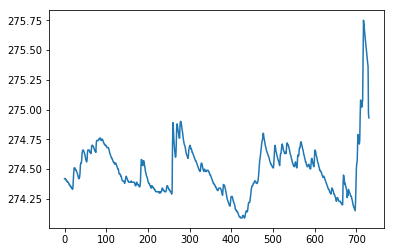

In [10]:
plt.plot(data_spline[3])

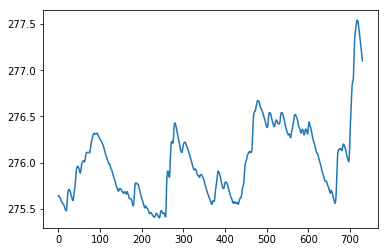

In [11]:
plt.plot(data_spline[-1])

In [133]:
from data_cleaning.ml_utils import *

In [127]:
inds, data = get_sliding_data(orig_dates, start_date, end_date, orig_full_data, bin_size=21)
data_bin_lin = np.array(list(map(interpolate, data)))
data_bin_spline = np.array(list(map(lambda x: interpolate(x, 2), data)))

/Users/joosko/work/ijs/ml/water4cities/conferenceWater/venv/lib/python3.6/site-packages/numpy/lib/shape_base.py:132: RuntimeWarning: Mean of empty slice
  res = asanyarray(func1d(inarr_view[ind0], *args, **kwargs))
/Users/joosko/work/ijs/ml/water4cities/conferenceWater/venv/lib/python3.6/site-packages/numpy/lib/shape_base.py:155: RuntimeWarning: Mean of empty slice
  buff[ind] = asanyarray(func1d(inarr_view[ind], *args, **kwargs))


0 9
val: linear | spline
r2 : 0.7295 | 0.7295
mse: 0.0121 | 0.0121
mae: 0.0882 | 0.0882
1 24
val: linear | spline
r2 : 0.9819 | 0.9819
mse: 0.0049 | 0.0049
mae: 0.0569 | 0.0569
2 33
val: linear | spline
r2 : 0.9914 | 0.9914
mse: 0.0006 | 0.0006
mae: 0.0212 | 0.0212
3 38
val: linear | spline
r2 : 0.1553 | 0.1553
mse: 0.0238 | 0.0238
mae: 0.1267 | 0.1267


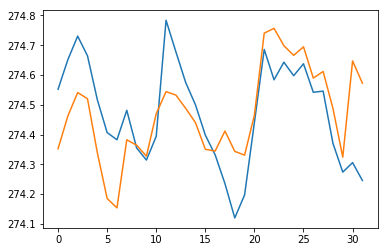

In [134]:
full_test(linear_model.LinearRegression(), inds, data_bin_lin, data_bin_spline)

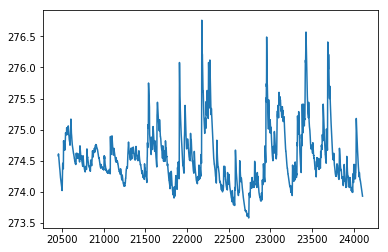

In [136]:
plt.plot(orig_full_data[38])

20852 21521
[278.22 278.28 278.32 278.34 278.35 278.36 278.36 278.35 278.24 278.25
 278.31 278.3  278.34 278.44 278.45 278.41 278.34 278.36 278.33 278.37
 278.39 278.43 278.44 278.54 278.7  278.86 278.95 279.   279.04    nan
    nan    nan    nan 279.85 279.91 280.03 280.19 280.34 280.46 280.54]
24106
21184
[   nan    nan    nan    nan    nan    nan    nan    nan    nan    nan
    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan
    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan
    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan
    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan
    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan
    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan
    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan
    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan
    nan    nan    nan    nan    nan    nan    nan   

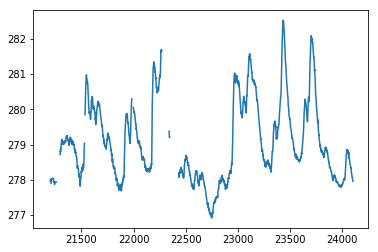

In [97]:
plt.plot(orig_full_data[4])
strange = orig_full_data[4]
start = find_date_ind(start_date, dates)
end = find_date_ind(end_date, dates)
print(start, end)
print(strange[end-20:end+20])
print(find_last_non_nan(strange))
print(find_fst_non_nan(strange))
print(strange[start-20:start+590])

In [60]:
inds

[4, 6, 9, 24, 33, 37, 38, 42, 45, 46, 47]

In [58]:
data

[array([288.113, 288.113, 288.114, 288.08 , 288.059, 288.062, 288.069,
        288.073, 288.082, 288.07 , 288.062, 288.04 , 288.046, 288.025,
        288.022, 288.023, 288.034, 288.021, 288.021, 288.024, 288.149,
        288.438, 288.471, 288.403, 288.291, 288.237, 288.189, 288.202,
        288.187, 288.178, 288.185, 288.138, 288.109, 288.103, 288.088,
        288.105, 288.206, 288.413, 288.52 , 288.398, 288.345, 288.523,
        288.526, 288.46 , 288.394, 288.329, 288.266, 288.248, 288.223,
        288.199, 288.174, 288.161, 288.16 , 288.147, 288.409, 288.457,
        288.392, 288.34 , 288.303, 288.33 , 288.278, 288.282, 288.264,
        288.26 , 288.453, 288.533, 288.467, 288.38 , 288.363, 288.341,
        288.301, 288.275, 288.268, 288.253, 288.24 , 288.398, 288.715,
        288.562, 288.473, 288.413, 288.407, 288.394, 288.397, 288.411,
        288.413, 288.388, 288.355, 288.327, 288.36 , 288.391, 288.403,
        288.406, 288.384, 288.365, 288.329, 288.321, 288.328, 288.326,
      